# Mchezopesa Ltd Prediction

##  Defining the Question

### a. Specifying the Question


> I have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

>> * A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).



### b. Defining the Metric for Success

> This project will be successful when:

>> 1. we accurately predict if the winning team is playing at their home or not and if it is a friendly match

>> 2. we manage to create a model that will predict and get more than 80% accuracy

>> 3. to get the lowest possible RMSE value

### c. Understanding the context 

The Coca-Cola ranking system was designed by FIFA and named 'SUM'. This ranking method utilises a metric that adds or subtracts points to the previous score instead of finding the average score. The lowest score which may be negative indicates the worst team while the highest score indicated the best team.

### d. Recording the Experimental Design

The Datasets in this project are fifa.ranking.csv and results.csv

The design for this project will include:

 > * Merging the two datasets

 > * Perform your EDA

 > * Perform any necessary feature engineering 

 > * Check of multicollinearity

 > * Polynomial regression

 > * Logistic regression

 > * Cross-validate the model

 > * Compute RMSE

 > * Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test



### e. Data Relevance

The relavance of our data will be answered by the following questions.

> How accurate is the data at predicting the outcome of the games?

> Was the dataset sufficient?

> Was the data biased?

> Is the data source a reliable source?

## 2. Reading the Data

In [2]:
# importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Loading the fifa ranking Dataset
fifa = pd.read_csv('fifa_ranking.csv', parse_dates=['rank_date'])
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
# loading the results Dataset
results = pd.read_csv('results.csv', parse_dates=['date'])
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 3. Cleaning the Data

### FIFA Ranking dataset

In [5]:
# Previewing the bottom of fifa dataset
#
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [6]:
# Determining the no. of records 
#
fifa.count()

rank                       57793
country_full               57793
country_abrv               57793
total_points               57793
previous_points            57793
rank_change                57793
cur_year_avg               57793
cur_year_avg_weighted      57793
last_year_avg              57793
last_year_avg_weighted     57793
two_year_ago_avg           57793
two_year_ago_weighted      57793
three_year_ago_avg         57793
three_year_ago_weighted    57793
confederation              57793
rank_date                  57793
dtype: int64

In [7]:
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [8]:
# checking the data types of the column
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [9]:
# selecting the neccessary columns to be used

fifa1 = fifa[['rank', 'rank_date', 'country_full', 'confederation']]
fifa1.head()

,rank,rank_date,country_full,confederation
0,1,1993-08-08,Germany,UEFA
1,2,1993-08-08,Italy,UEFA
2,3,1993-08-08,Switzerland,UEFA
3,4,1993-08-08,Sweden,UEFA
4,5,1993-08-08,Argentina,CONMEBOL


In [10]:
# creating a copy of the dataframe
fifa2 = fifa1

# creating seperate columns with month and year from the rank date column
fifa2['Year'] = fifa1.rank_date.dt.year
fifa2['Month']= fifa1.rank_date.dt.month
fifa2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rank,rank_date,country_full,confederation,Year,Month
0,1,1993-08-08,Germany,UEFA,1993,8
1,2,1993-08-08,Italy,UEFA,1993,8
2,3,1993-08-08,Switzerland,UEFA,1993,8
3,4,1993-08-08,Sweden,UEFA,1993,8
4,5,1993-08-08,Argentina,CONMEBOL,1993,8


In [11]:
# renaming the country column to home team for the fifa2 dataframe
fifa2 = fifa2.rename({'country_full': 'home_team'}, axis = 1)
fifa2.columns

Index(['rank', 'rank_date', 'home_team', 'confederation', 'Year', 'Month'], dtype='object')

In [12]:
# renaming the country column to away team for the fifa3 dataframe
fifa3 = fifa1.rename({'country_full':'away_team'}, axis=1)
fifa3.columns

Index(['rank', 'rank_date', 'away_team', 'confederation', 'Year', 'Month'], dtype='object')

In [13]:
fifa2.duplicated().sum()

38

In [14]:
fifa2.drop_duplicates(inplace= True)
fifa2.shape

(57755, 6)

### Results dataset

In [15]:
# preveiwing the dataset from the bottom
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [16]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [17]:
# selecting the necessary columns
results = results.drop('city', 1)
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral'],
      dtype='object')

In [18]:
# checking for duplicates
results.duplicated().any()

# The boolean "False" shows there are no duplicates

False

In [19]:
# describing the date column to identify when the data was collected to see whether it matches the fifa ranking dataset

results['date'].describe()

# we can see the data was collected from 1872
# and for the fifa data is collected from 1993 August

count                   40839
unique                  15115
top       2012-02-29 00:00:00
freq                       66
first     1872-11-30 00:00:00
last      2019-07-20 00:00:00
Name: date, dtype: object

In [20]:
# creating a copy to drop the unnecessary values ranging from 1872-1992 to match the fifa ranking dataset
results1 = results[results['date'] > '1993-08-01']
results1.shape

(22925, 8)

In [21]:
# creating a copy of the dataframe
# results2 = results1

# creating seperate columns with month and year from the rank date column

results1['Year'] = results1.date.dt.year
results1['Month']= results1.date.dt.month
results1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,Month
17914,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,1993,8
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False,1993,8
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,1993,8
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,False,1993,8


### Merging the Datasets

In [22]:
fifa_df1 = pd.merge(results1, fifa2, how='left', on=['Year', 'Month','home_team'])
fifa_df1.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,Month,rank,rank_date,confederation
0,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58.0,1993-08-08,CAF
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,1993,8,59.0,1993-08-08,CONMEBOL
2,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False,1993,8,8.0,1993-08-08,CONMEBOL
3,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,1993,8,35.0,1993-08-08,CONMEBOL
4,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,False,1993,8,65.0,1993-08-08,CAF


In [23]:
fifa_df1 = fifa_df1

fifa_df1 = fifa_df1.rename({'rank':'home_team_rank'},axis = 1)
fifa_df1.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral', 'Year', 'Month', 'home_team_rank',
       'rank_date', 'confederation'],
      dtype='object')

In [24]:
fifa_df2 = pd.merge(results1, fifa3, how='left', on=['Year', 'Month', 'away_team'])
fifa_df2.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,Month,rank,rank_date,confederation
0,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,25.0,1993-08-08,CAF
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,1993,8,22.0,1993-08-08,CONMEBOL
2,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False,1993,8,14.0,1993-08-08,CONCACAF
3,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,1993,8,94.0,1993-08-08,CONMEBOL
4,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,False,1993,8,86.0,1993-08-08,CAF


In [25]:
fifa_df2 = fifa_df2.rename({'rank':'away_team_rank'}, axis=1)
fifa_df2.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral', 'Year', 'Month', 'away_team_rank',
       'rank_date', 'confederation'],
      dtype='object')

In [26]:
fifa_finale = pd.merge(fifa_df1,fifa_df2, how='inner', right_on =['Year','Month', 'away_team'], left_on=['Year', 'Month','away_team'])
fifa_finale.head()

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,Year,Month,home_team_rank,rank_date_x,confederation_x,date_y,home_team_y,home_score_y,away_score_y,tournament_y,country_y,neutral_y,away_team_rank,rank_date_y,confederation_y
0,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58.0,1993-08-08,CAF,1993-08-07,Senegal,0,0,FIFA World Cup qualification,Ivory Coast,True,25.0,1993-08-08,CAF
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,1993,8,59.0,1993-08-08,CONMEBOL,1993-08-08,Bolivia,3,1,FIFA World Cup qualification,Bolivia,False,22.0,1993-08-08,CONMEBOL
2,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False,1993,8,8.0,1993-08-08,CONMEBOL,1993-08-08,Brazil,1,1,Friendly,Brazil,False,14.0,1993-08-08,CONCACAF
3,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,1993,8,35.0,1993-08-08,CONMEBOL,1993-08-08,Ecuador,5,0,FIFA World Cup qualification,Ecuador,False,94.0,1993-08-08,CONMEBOL
4,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,1993,8,35.0,1993-08-08,CONMEBOL,1993-08-22,Bolivia,7,0,FIFA World Cup qualification,Bolivia,False,94.0,1993-08-08,CONMEBOL


## 5. Tidying the Dataset

In [27]:
fifa_finale.columns

Index(['date_x', 'home_team_x', 'away_team', 'home_score_x', 'away_score_x',
       'tournament_x', 'country_x', 'neutral_x', 'Year', 'Month',
       'home_team_rank', 'rank_date_x', 'confederation_x', 'date_y',
       'home_team_y', 'home_score_y', 'away_score_y', 'tournament_y',
       'country_y', 'neutral_y', 'away_team_rank', 'rank_date_y',
       'confederation_y'],
      dtype='object')

In [28]:
fifa_finale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40167 entries, 0 to 40166
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_x           40167 non-null  datetime64[ns]
 1   home_team_x      40167 non-null  object        
 2   away_team        40167 non-null  object        
 3   home_score_x     40167 non-null  int64         
 4   away_score_x     40167 non-null  int64         
 5   tournament_x     40167 non-null  object        
 6   country_x        40167 non-null  object        
 7   neutral_x        40167 non-null  bool          
 8   Year             40167 non-null  int64         
 9   Month            40167 non-null  int64         
 10  home_team_rank   31713 non-null  float64       
 11  rank_date_x      31713 non-null  datetime64[ns]
 12  confederation_x  31713 non-null  object        
 13  date_y           40167 non-null  datetime64[ns]
 14  home_team_y      40167 non-null  objec

In [29]:
# dropping unnecessary columns for modelling
fifa_finale = fifa_finale.drop(['date_x','confederation_x','rank_date_x','date_y','home_team_y', 'home_score_y', 'away_score_y', 'tournament_y',
       'country_y', 'neutral_y', 'confederation_y', 'rank_date_y'], axis=1)
fifa_finale.head()

,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,Year,Month,home_team_rank,away_team_rank
0,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58.0,25.0
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,1993,8,59.0,22.0
2,Brazil,Mexico,1,1,Friendly,Brazil,False,1993,8,8.0,14.0
3,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,1993,8,35.0,94.0
4,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,1993,8,35.0,94.0


In [30]:
fifa_finale.head()


,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,Year,Month,home_team_rank,away_team_rank
0,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58.0,25.0
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,1993,8,59.0,22.0
2,Brazil,Mexico,1,1,Friendly,Brazil,False,1993,8,8.0,14.0
3,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,1993,8,35.0,94.0
4,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,1993,8,35.0,94.0


In [31]:
# Dealing with the Missing Data
#
fifa_finale.dropna(axis=0, how='any')

,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,Year,Month,home_team_rank,away_team_rank
0,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58.0,25.0
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,1993,8,59.0,22.0
2,Brazil,Mexico,1,1,Friendly,Brazil,False,1993,8,8.0,14.0
3,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,1993,8,35.0,94.0
4,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,1993,8,35.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...
38487,Nigeria,Argentina,1,2,FIFA World Cup,Russia,True,2018,6,48.0,5.0
38488,France,Argentina,4,3,FIFA World Cup,Russia,True,2018,6,7.0,5.0
38489,France,Argentina,4,3,FIFA World Cup,Russia,True,2018,6,7.0,5.0
38490,Japan,Poland,0,1,FIFA World Cup,Russia,True,2018,6,61.0,8.0


In [32]:
# Confirming the Missing Data
#
fifa_finale.isnull().sum()


home_team_x          0
away_team            0
home_score_x         0
away_score_x         0
tournament_x         0
country_x            0
neutral_x            0
Year                 0
Month                0
home_team_rank    8454
away_team_rank    8673
dtype: int64

In [0]:
fifa_finale.dropna(how='any', inplace=True)

In [34]:
fifa_finale.isnull().sum()

home_team_x       0
away_team         0
home_score_x      0
away_score_x      0
tournament_x      0
country_x         0
neutral_x         0
Year              0
Month             0
home_team_rank    0
away_team_rank    0
dtype: int64

In [35]:
# More data cleaning procedures
#
fifa_finale.duplicated().any()

True

In [0]:
fifa_finale.drop_duplicates(inplace=True)

In [37]:
fifa_finale.duplicated().any()

False

In [38]:
fifa_finale.shape

(16860, 11)

## Feature Engineering

In [39]:
# renaming the columns

fifa_finale = fifa_finale.rename({'home_team_x':'home_team', 'home_score_x':'home_score', 'away_score_x':'away_score',
                                  'tournament_x':'tournament', 'country_x':'country', 'neutral_x':'neutral'}, axis=1)
fifa_finale.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'neutral', 'Year', 'Month', 'home_team_rank',
       'away_team_rank'],
      dtype='object')

In [0]:
# creating a fuction to classify the tournament column
def Tournament(Soccer):
    if (Soccer == 'FIFA World Cup qualification') or (Soccer == 'FIFA World Cup'):
        return 'World_Cup'
    if Soccer == 'Friendly':
        return 'Friendly'
    else:
        return 'Other Matches'


In [41]:
# creating a coulumn to classify the tournaments to world cup, friendly or other matches
fifa_finale2 = fifa_finale

fifa_finale2['Matches'] = fifa_finale2['tournament'].apply(lambda W:Tournament(W))
fifa_finale2['Matches'].unique()

array(['World_Cup', 'Friendly', 'Other Matches'], dtype=object)

In [42]:
fifa_finale2['neutral'] = pd.get_dummies(fifa_finale2['neutral'], drop_first=True)
fifa_finale2.neutral.unique()

array([1, 0], dtype=uint8)

In [43]:
# creating a new column to show whether it was a win, loss or draw
fifa_finale2['final_score'] = fifa_finale2['home_score'] - fifa_finale2['away_score']
def HOME_TEAM(home_score):
    if home_score > 0:
        return 'Win'
    elif home_score < 0:
        return 'Loss'
    else:
        return 'Draw'
      
fifa_finale2['Result'] = fifa_finale2['final_score'].apply(lambda h: HOME_TEAM(h))
fifa_finale2.head(5)

,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,Month,home_team_rank,away_team_rank,Matches,final_score,Result
0,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,1,1993,8,58.0,25.0,World_Cup,0,Draw
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,0,1993,8,59.0,22.0,World_Cup,2,Win
2,Brazil,Mexico,1,1,Friendly,Brazil,0,1993,8,8.0,14.0,Friendly,0,Draw
3,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,0,1993,8,35.0,94.0,World_Cup,5,Win
6,Bolivia,Venezuela,7,0,FIFA World Cup qualification,Bolivia,0,1993,8,59.0,94.0,World_Cup,7,Win


## 6. Exploratory Analysis

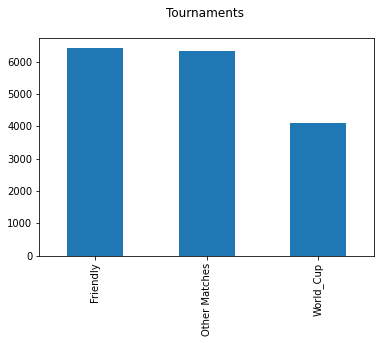

In [44]:
fifa_finale['Matches'].value_counts().plot.bar(title='Tournaments \n')

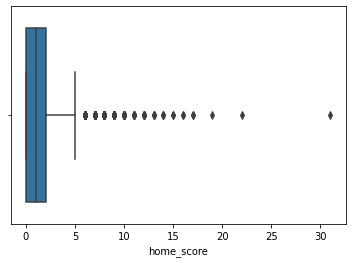

In [45]:
sns.boxplot(fifa_finale['home_score'])


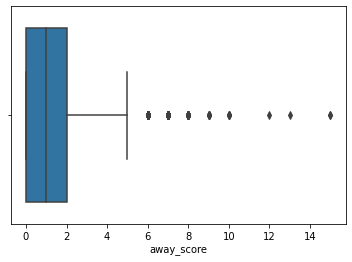

In [46]:
sns.boxplot(fifa_finale['away_score'])

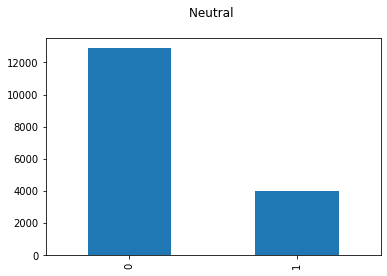

In [47]:
fifa_finale['neutral'].value_counts().plot.bar(title='Neutral \n')

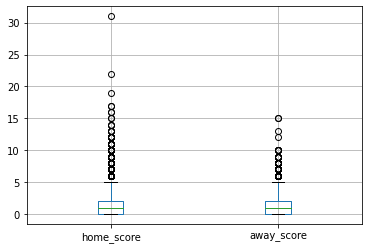

In [48]:
# Ploting the univariate summaries and recording our observations
#
fifa_finale.boxplot(column=['home_score','away_score'])

**There are multiple outliers but we will not drop them since they play a big role in training the data**

In [49]:
independent_corr = fifa_finale2[['home_score','away_score','home_team_rank','away_team_rank']].corr()
independent_corr

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.000000,-0.163834,-0.135566,0.318635
away_score,-0.163834,1.000000,0.221625,-0.179788
home_team_rank,-0.135566,0.221625,1.000000,0.469522
away_team_rank,0.318635,-0.179788,0.469522,1.000000


In [50]:
pd.DataFrame(np.linalg.inv(independent_corr.values), index = independent_corr.index, columns=independent_corr.columns)

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.259260,-0.008033,0.463811,-0.620457
away_score,-0.008033,1.179951,-0.466170,0.433578
home_team_rank,0.463811,-0.466170,1.635473,-0.999488
away_team_rank,-0.620457,0.433578,-0.999488,1.744933


**The above description shows that there is very little collinearity since the values are close to zero**

## 7. Implementing the Solution

### Polynomial Approach

In [52]:
# Predicting the score of the home team
X = fifa_finale2.iloc[:, [0,1,3,6,9,10,11,12]]
y = fifa_finale2['home_score'].values

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, away_train, away_test = train_test_split(X, y, test_size=0.2, random_state=0)
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
away_pred = regressor.predict(X_test)
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(away_test, away_pred)))

The RMSE score for the model :  2.7820148080326314e-14


In [56]:
# Predicting the score of the away team
X = fifa_finale2.iloc[:, [2,6,9,10,12]]
y = fifa_finale2['away_score'].values

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, away_train, away_test = train_test_split(X, y, test_size=0.2, random_state=0)
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
away_pred = regressor.predict(X_test)
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(away_test, away_pred)))

The RMSE score for the model :  2.225366004790852


### Logistic Approach

In [0]:

X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:

print(residuals.mean())

pd.DataFrame(residuals).describe()

In [0]:
# plotting residuals
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

#### Heteroskedasity using Bartlett’s test

In [0]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

##  Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

In [0]:
No!

### b). Do we need other data to answer our question?

Yes ... The one we have is not sufficient to accurately predict the fifa scores

### c). Did we have the right question?

Yes